In [1]:
## Using 6m Smoked Mice object to demonstrate how to extract / group interesting meta information
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.5.2.dev5+ge5d246aa, on 2020-06-01 12:25.


In [2]:
## Set global plotting parameters
sc.set_figure_params(vector_friendly = True)
plt.rcParams["figure.figsize"] = (6, 5)
sb.set_style("ticks")

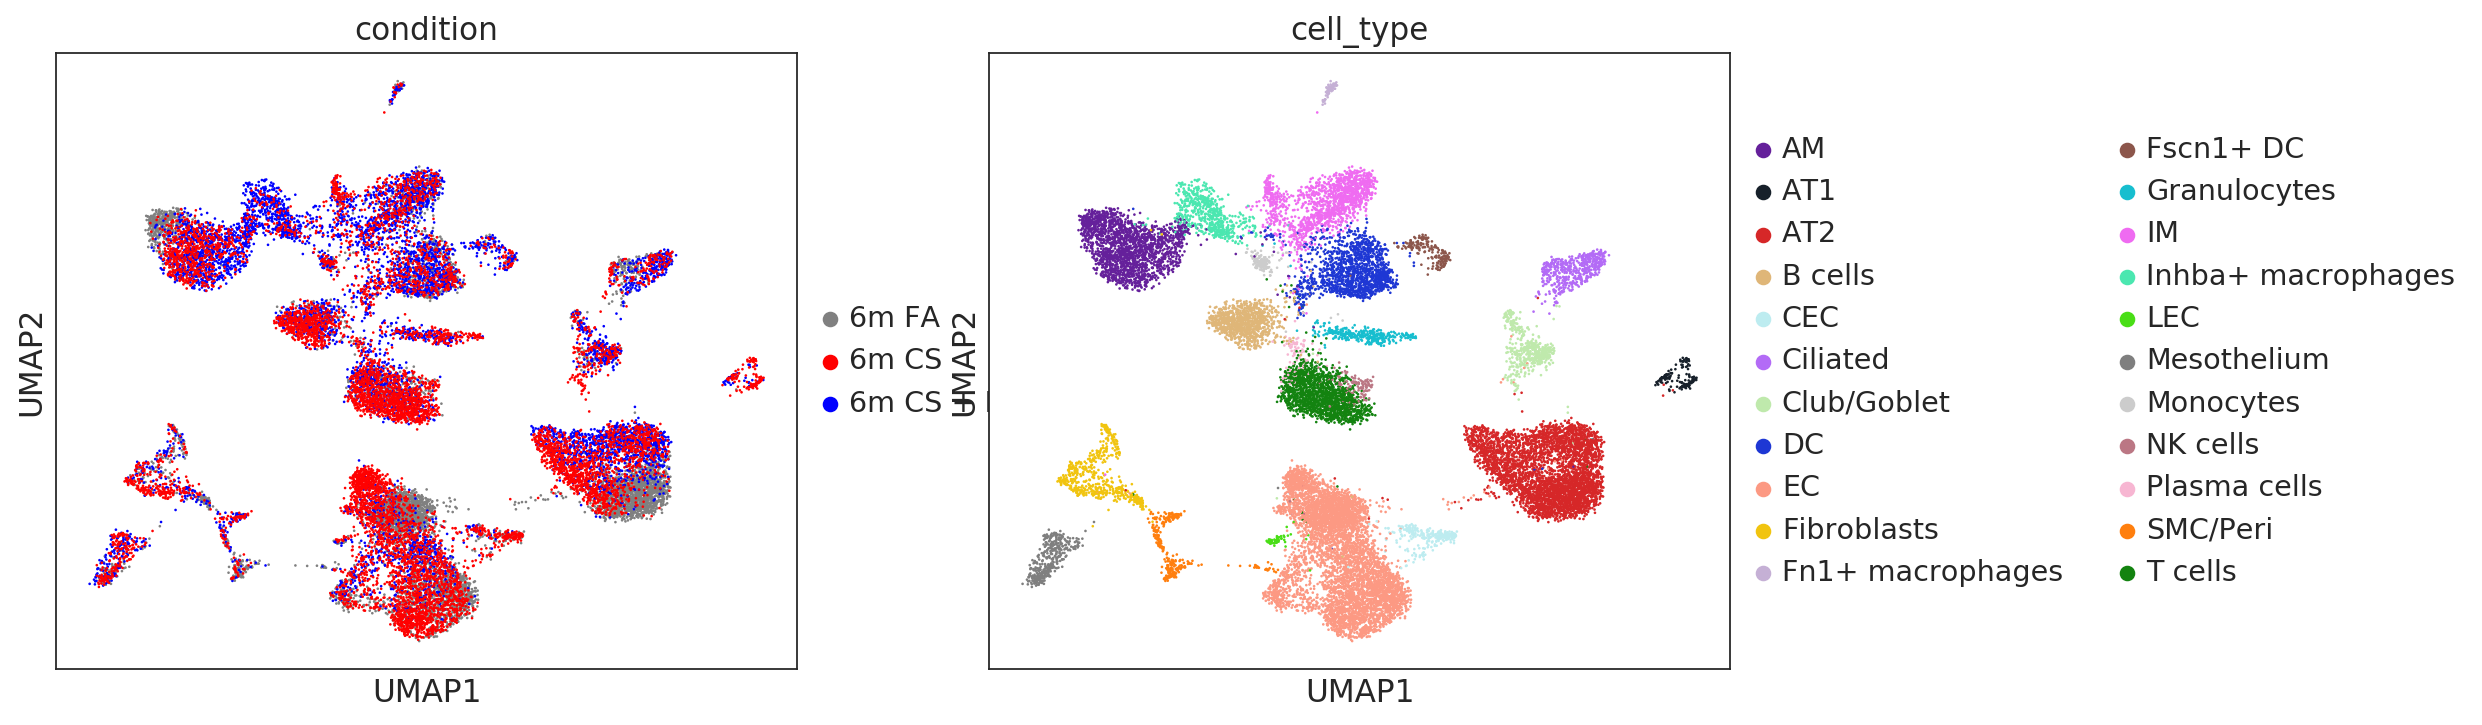

In [27]:
## Load object
folder = "/media/agando/206c956b-9fe0-492c-b181-e920c87f2401/Projects/200204_SmokedMice_Revision/"
adata = sc.read(folder + "200422_Smoked_Mice_6m_allcells_noMixture_noLyz1.h5ad")
sc.pl.umap(adata, color = ["condition", "cell_type"])

### Metadata is stored in adata.obs

In [4]:
## look at first 5 cells
adata.obs.head(5)

,air,condition,identifier,name,n_counts,n_genes,percent.mito,QC_group,size_factors,S_score,...,louvain_2,louvain_3,louvain,cell_type,cell_type_whole,cell_type_condition,Axin2_pos,Tcf4_pos,NIK NFkB Signaling (GO:0038061) score,positive regulation of NIK score
muc14440_AACTTTTCCATC,filtered air,6m FA,muc14440,FA-1,1999.0,1342,0.045023,low,3.119536,-0.019027,...,12,41,41,Ciliated,Ciliated,Ciliated_6m FA,False,False,0.025698,0.016609
muc14440_CATCCCCACGAA,filtered air,6m FA,muc14440,FA-1,1998.0,1327,0.034034,low,2.707024,-0.004371,...,12,41,41,Ciliated,Ciliated,Ciliated_6m FA,False,True,0.008702,0.040212
muc14440_TGGCGTACGACG,filtered air,6m FA,muc14440,FA-1,1996.0,1183,0.041583,low,2.723272,-0.013501,...,12,41,41,Ciliated,Ciliated,Ciliated_6m FA,False,False,0.036622,0.018783
muc14440_CGCACGCCGTTT,filtered air,6m FA,muc14440,FA-1,1982.0,1358,0.036327,low,3.058854,-0.009971,...,12,41,41,Ciliated,Ciliated,Ciliated_6m FA,False,False,0.023666,0.004014
muc14440_CGTTACCCTCGG,filtered air,6m FA,muc14440,FA-1,1977.0,1138,0.140617,low,2.645219,-0.013790,...,0,3,3,EC,EC,EC_6m FA,False,False,0.036509,0.026953


In [7]:
## Look at specific cells
cells = ["muc14440_TAACGCAACGAC", "muc14440_CGACACGGGCCA"]
adata.obs.loc[cells]

,air,condition,identifier,name,n_counts,n_genes,percent.mito,QC_group,size_factors,S_score,...,louvain_2,louvain_3,louvain,cell_type,cell_type_whole,cell_type_condition,Axin2_pos,Tcf4_pos,NIK NFkB Signaling (GO:0038061) score,positive regulation of NIK score
muc14440_TAACGCAACGAC,filtered air,6m FA,muc14440,FA-1,1833.0,741,0.04419,low,1.618526,0.007761,...,14,42,42,Club/Goblet,Club/Goblet,Club/Goblet_6m FA,False,False,0.008715,-0.001138
muc14440_CGACACGGGCCA,filtered air,6m FA,muc14440,FA-1,1826.0,919,0.03943,low,2.134230,-0.008766,...,4,0,0,AT2,AT2,AT2_6m FA,False,False,0.010282,0.028691


In [8]:
## Look at specific columns
adata.obs.loc[:, ["cell_type", "condition"]].head()

,cell_type,condition
muc14440_AACTTTTCCATC,Ciliated,6m FA
muc14440_CATCCCCACGAA,Ciliated,6m FA
muc14440_TGGCGTACGACG,Ciliated,6m FA
muc14440_CGCACGCCGTTT,Ciliated,6m FA
muc14440_CGTTACCCTCGG,EC,6m FA


### Some overview Statistics

In [16]:
## Nr of cells per e.g. cell_type 
adata.obs.cell_type.value_counts()

EC                    5579
AT2                   4026
AM                    1985
T cells               1702
DC                    1424
IM                    1414
B cells                981
Inhba+ macrophages     603
Fibroblasts            552
Ciliated               528
Club/Goblet            509
Mesothelium            396
Granulocytes           334
SMC/Peri               301
CEC                    271
Fscn1+ DC              176
Monocytes              149
AT1                    142
NK cells               122
Plasma cells            92
Fn1+ macrophages        77
LEC                     50
Name: cell_type, dtype: int64

In [17]:
## Nr of cells per e.g. condition
adata.obs.condition.value_counts()

6m CS             8518
6m CS + LTbeta    6792
6m FA             6103
Name: condition, dtype: int64

In [19]:
## Nr of cells per cell_type split by condition :D 
## (but beware, these values are not normalizted to anything, relative frequencies are more robust)
## just wanted to provide you with this code line, you can use any grouping from your adata object for this

pd.crosstab(adata.obs.cell_type, adata.obs.condition)

condition,6m FA,6m CS,6m CS + LTbeta
cell_type,,,
AM,397,643,945
AT1,1,107,34
AT2,1561,1335,1130
B cells,110,550,321
CEC,67,173,31
Ciliated,154,140,234
Club/Goblet,81,189,239
DC,327,409,688
EC,2463,2436,680


### Extract specific information and save table

In [11]:
columns = ["cell_type", "condition", "Ace2", "Sftpc", "n_counts"]   ## can be any column / gene from adata

tab = sc.get.obs_df(adata, keys = columns, layer = None, use_raw = True)
# tab = sc.get.obs_df(adata, keys = columns, layer = "counts", use_raw = False)  ## if you want raw counts

tab.head()

,cell_type,condition,Ace2,Sftpc,n_counts
muc14440_AACTTTTCCATC,Ciliated,6m FA,0.0,0.278056,1999.0
muc14440_CATCCCCACGAA,Ciliated,6m FA,0.0,1.168280,1998.0
muc14440_TGGCGTACGACG,Ciliated,6m FA,0.0,0.000000,1996.0
muc14440_CGCACGCCGTTT,Ciliated,6m FA,0.0,0.282860,1982.0
muc14440_CGTTACCCTCGG,EC,6m FA,0.0,3.148642,1977.0


In [12]:
## Save this table (e.g for plotting in Excel)
out_folder = "/home/agando/Documents/GitHub/Code_Repository/Python/output/"
tab.to_csv(out_folder + "6m_smoked_mice_meta.txt", sep = "\t", decimal = ",")

### Some basic Plotting based on this table
E.g. expression level of one example gene split by condition

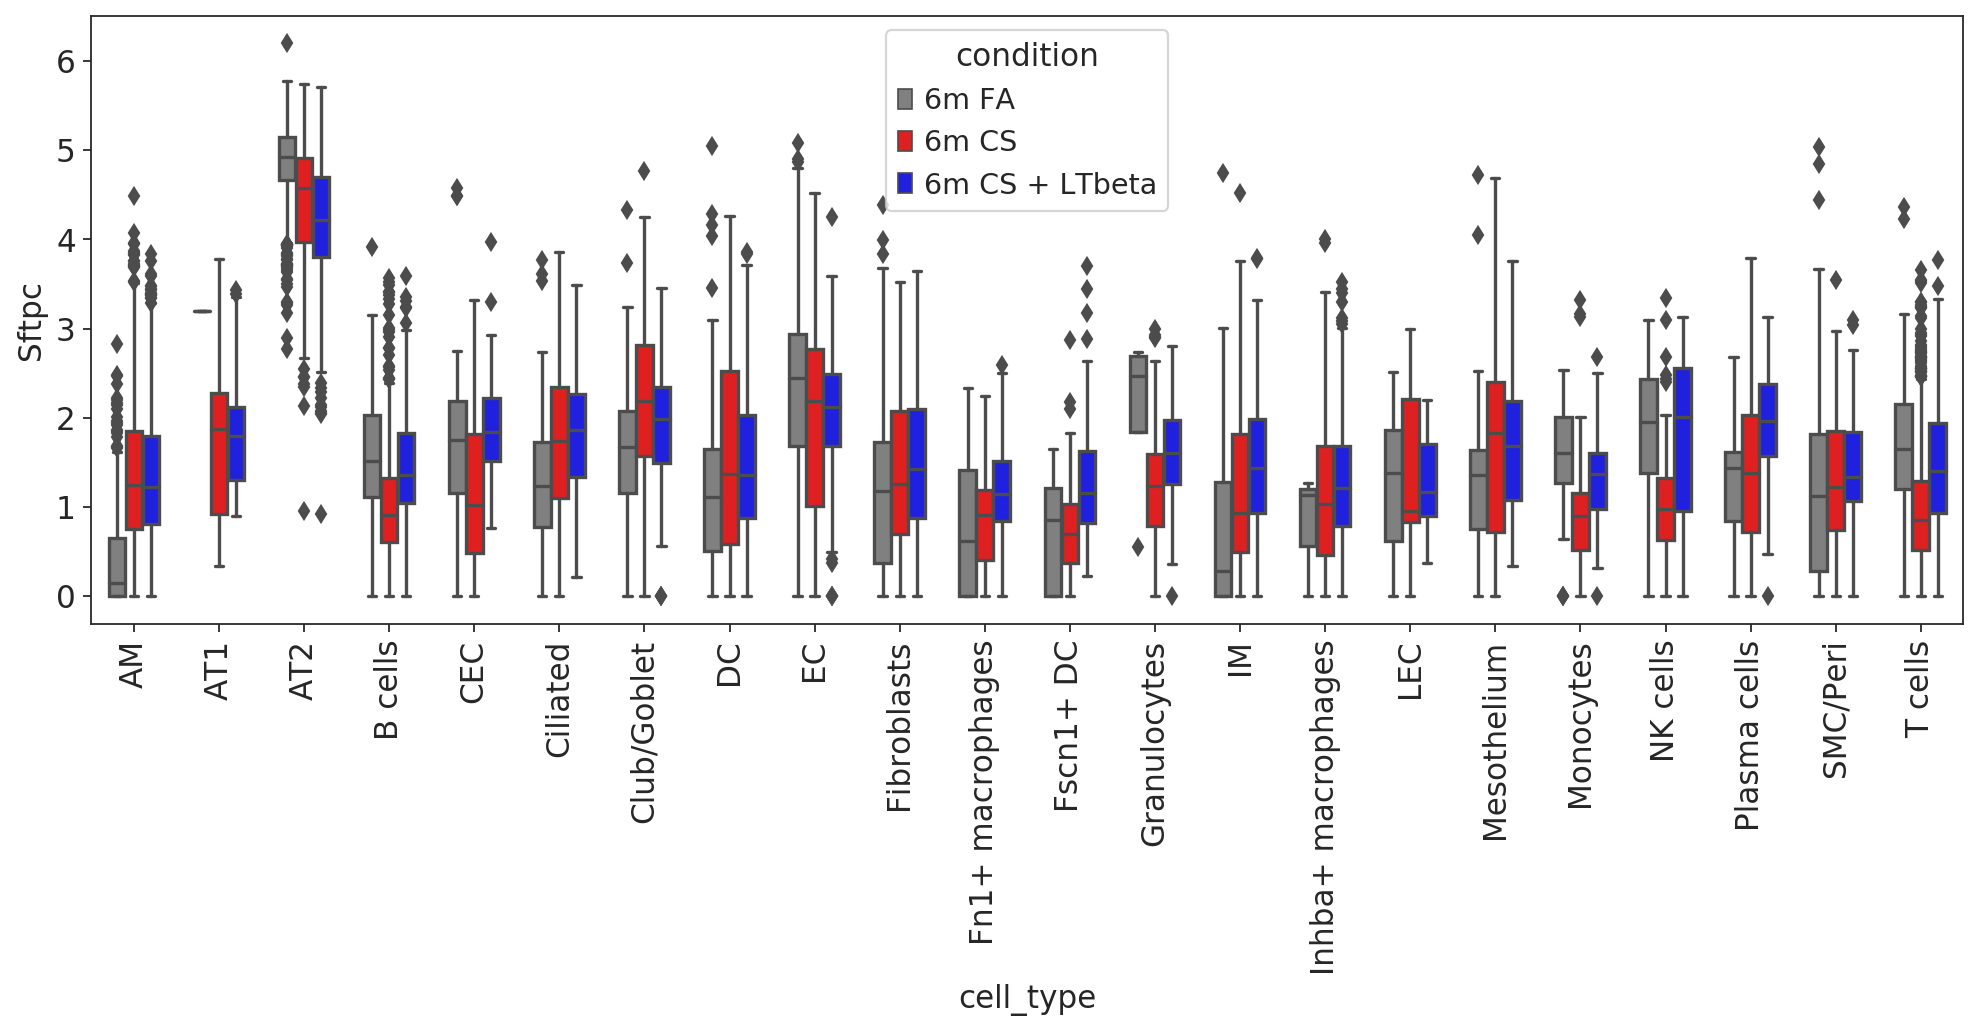

In [15]:
figsize = (15, 5)
fig, ax = plt.subplots()
fig.set_size_inches(figsize)
palette = adata.uns["condition_colors"]   ## if you want the same colors as in UMAP

fig = sb.boxplot(data = tab, x = "cell_type", y = "Sftpc", width = 0.6, hue = "condition",
                 showfliers = True, palette = palette)
    
## Also add single dots
#fig = sb.stripplot(data = tab, x = "cell_type", y = "Sftpc", palette = ["black"],
#                   size = 4, hue = "condition", dodge = True)

fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)                ## rotate labels
# sb.despine()                                                           ## to not show ouline box
# plt.savefig(plot_folder + "filename.pdf", bbox_to_anchor = "tight")    ## save plot

plt.show()

### Drop some columns from adata object

In [20]:
adata.obs.columns

Index(['air', 'condition', 'identifier', 'name', 'n_counts', 'n_genes',
       'percent.mito', 'QC_group', 'size_factors', 'S_score', 'G2M_score',
       'phase', 'louvain_1', 'louvain_2', 'louvain_3', 'louvain', 'cell_type',
       'cell_type_whole', 'cell_type_condition', 'Axin2_pos', 'Tcf4_pos',
       'NIK NFkB Signaling (GO:0038061) score',
       'positive regulation of NIK score'],
      dtype='object')

In [21]:
adata.obs.drop(labels = ["louvain", "phase"], axis = 1, inplace = True)
adata.obs.columns

Index(['air', 'condition', 'identifier', 'name', 'n_counts', 'n_genes',
       'percent.mito', 'QC_group', 'size_factors', 'S_score', 'G2M_score',
       'louvain_1', 'louvain_2', 'louvain_3', 'cell_type', 'cell_type_whole',
       'cell_type_condition', 'Axin2_pos', 'Tcf4_pos',
       'NIK NFkB Signaling (GO:0038061) score',
       'positive regulation of NIK score'],
      dtype='object')

### Reorder Labels of a specific column

In [28]:
## See current ordering
adata.obs.condition.cat.categories

Index(['6m FA', '6m CS', '6m CS + LTbeta'], dtype='object')

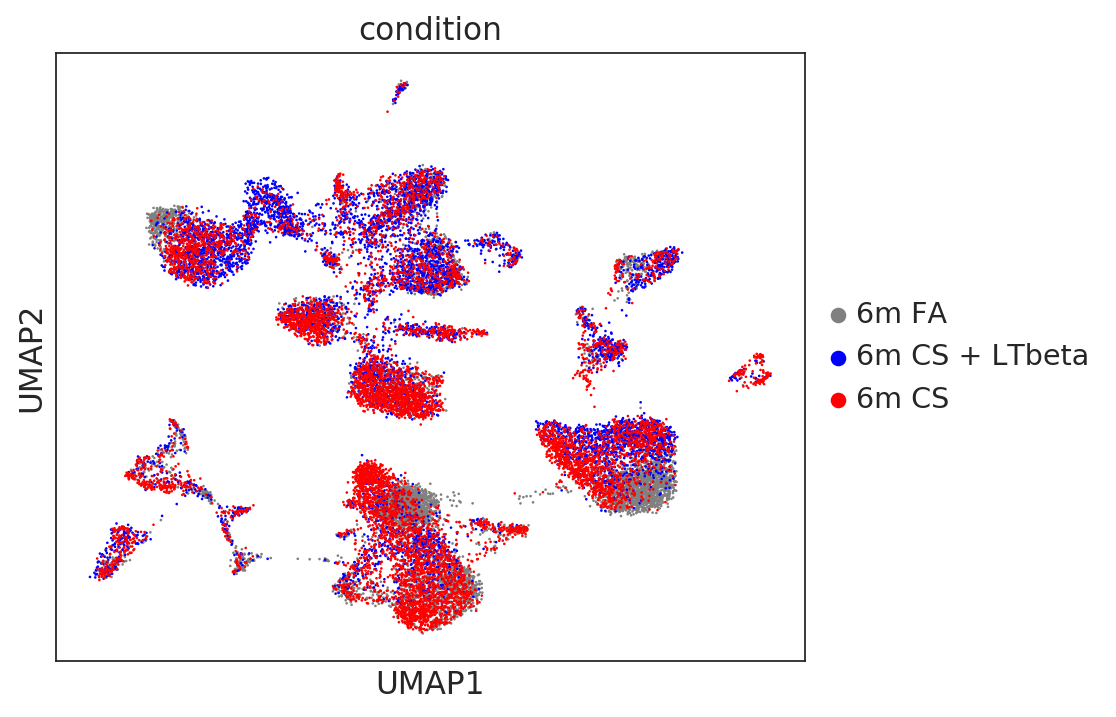

In [30]:
## set new order
adata.obs.condition.cat.reorder_categories(["6m FA", "6m CS + LTbeta", "6m CS"], inplace = True)
sc.pl.umap(adata, color = "condition", palette = ["gray", "blue", "red"])

### Combine two observation columns into one new

Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_condition' as categorical


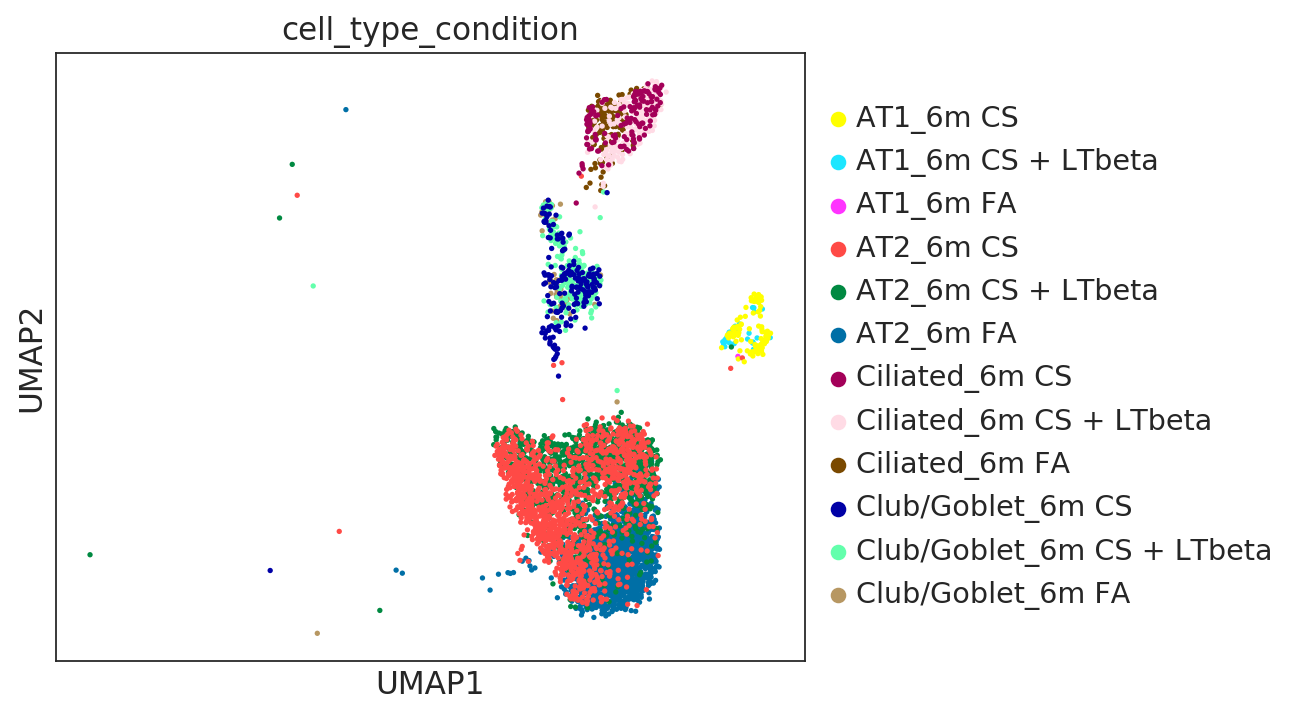

In [23]:
adata.obs["cell_type_condition"] = adata.obs.loc[:, ["cell_type", "condition"]].agg("_".join, axis = 1)

## show it only on Epithel
cells = adata.obs.cell_type.isin(["AT1", "AT2", "Ciliated", "Club/Goblet"]) 
sc.pl.umap(adata[cells], color = "cell_type_condition")